In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import tensorflow as tf 
from tensorflow.keras import models, layers 

plt.style.use("ggplot")

In [9]:
df = pd.read_csv('cancer_data.csv')

In [10]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

/home/harish/anaconda3/envs/machine_learning/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


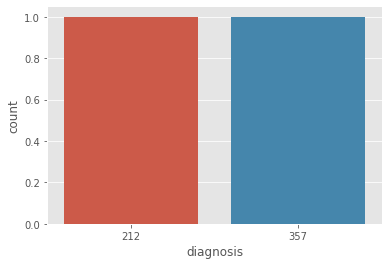

In [12]:
# plt.figure(figsize=[17,9])
sns.countplot(df['diagnosis'].value_counts())
plt.show()

In [13]:
#droping feature
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [14]:
# independent variables
x = df.drop('diagnosis',axis=1)
#dependent variables
y = df.diagnosis

In [17]:
lb = LabelEncoder()
y = lb.fit_transform(y)

In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=40)

In [20]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [11]:
#importing keras
import keras
#importing sequential module
from keras.models import Sequential
# import dense module for hidden layers
from keras.layers import Dense
#importing activation functions
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [28]:
#creating model

def getModel():

    model = models.Sequential()
    model.add(layers.Dense(units=9, kernel_initializer='he_uniform', activation='relu', input_shape=(30,)))
    model.add(layers.Dense(units=9, kernel_initializer='he_uniform', activation='relu'))
    model.add(layers.Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

    model.summary()
    return model

In [29]:
classifier = getModel()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 9)                 279       
_________________________________________________________________
dense_7 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 10        
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


In [30]:
#compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
#fitting the ANN to the training set
model = classifier.fit(xtrain, ytrain, batch_size=100, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 3ms/step - loss: 1.1786 - accuracy: 0.3819
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1043 - accuracy: 0.3844
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0363 - accuracy: 0.3894
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9763 - accuracy: 0.3894
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9195 - accuracy: 0.3920
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8709 - accuracy: 0.3995
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8264 - accuracy: 0.4095
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7856 - accuracy: 0.4146
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7496 - accuracy: 0.4271
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7172 - accuracy: 0.4422
Epoch 11/100
4/4 [===========

In [32]:
#now testing for Test data
y_pred = classifier.predict(xtest)
y_pred = (y_pred > 0.5)
print(y_pred)

[[False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 

In [34]:
cm = confusion_matrix(ytest,y_pred)
score = accuracy_score(ytest,y_pred)
print(cm)
print('score is:',score)

[[111   4]
 [  3  53]]
score is: 0.9590643274853801


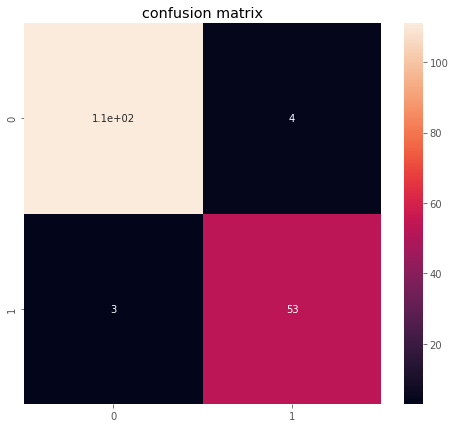

In [39]:
# creating heatmap of confussion matrix
plt.figure(figsize=[8,7])
sns.heatmap(cm,annot=True)
plt.title("confusion matrix")
plt.show()

dict_keys(['loss', 'accuracy'])


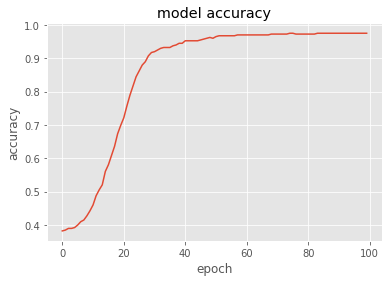

In [42]:
# list all data in history
print(model.history.keys())
# summarize history for accuracy
plt.plot(model.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

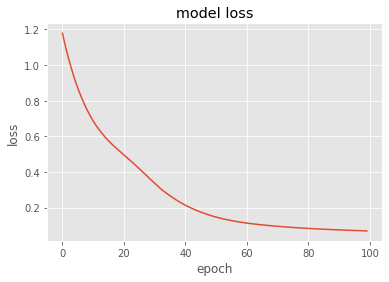

In [43]:
# summarize history for loss
plt.plot(model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

SGD OPTIMISER

In [44]:
m1 = getModel()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 9)                 279       
_________________________________________________________________
dense_10 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 10        
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


In [45]:
m1.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])
model = m1.fit(xtrain,ytrain,batch_size=100,epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7597 - accuracy: 0.4020
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7202 - accuracy: 0.4598
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6850 - accuracy: 0.5251
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6531 - accuracy: 0.5905
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6235 - accuracy: 0.6608
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5961 - accuracy: 0.7060
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5710 - accuracy: 0.7513
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5480 - accuracy: 0.7889
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5273 - accuracy: 0.8141
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5084 - accuracy: 0.8392
Epoch 11/100
4/4 [===========

In [46]:
y_pred1 = m1.predict(xtest)
y_pred1 = (y_pred1>0.5)

In [47]:
cm = confusion_matrix(ytest,y_pred1)
score = accuracy_score(ytest,y_pred1)
print(cm)
print('score is:',score)

[[112   3]
 [  1  55]]
score is: 0.9766081871345029


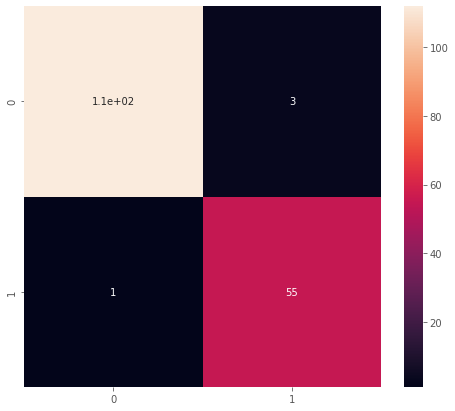

In [49]:
plt.figure(figsize=[8,7])
sns.heatmap(cm,annot=True)
plt.show()

dict_keys(['loss', 'accuracy'])


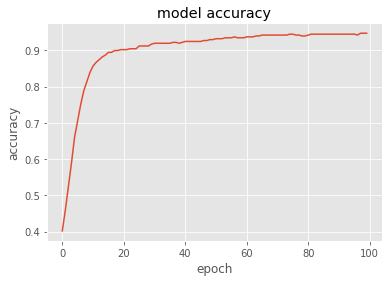

In [50]:
print(model.history.keys())
# summarize history for accuracy
plt.plot(model.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

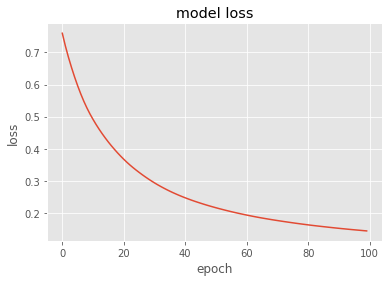

In [51]:
plt.plot(model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()